In [418]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para visualizar la totalidad de columnas

# Imputación de nulos usando métodos avanzados estadísticos
#-----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [419]:
#cargo los dataframe
df_activity = pd.read_csv("Customer Flight Activity.csv")
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

A partir de aqui, empiezo a analizar los datos para cada uno de los dataframe: 

-Revisión de estructura  
-Tipos de datos, estadística  
-Valores únicos  
-Duplicados  
-Nulos  

Para hacerlo de una manera ordenada primero analizo df_activity y posteriormente df_loyalty.


## Dataframe: df_activity

In [420]:
df_activity.head() # Reviso las primeras filas de df_activity.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [421]:
df_activity.sample(5) # Me interesa ver filas aleatorias de df_activity, quiero ver si tengo información para otros años. 
# Tambien podría verlo con la función .nunique() aplicándola a la columna "Year" de df_activity.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
22054,375511,2017,2,4,0,4,2068,206.0,0,0
319238,899509,2018,7,0,0,0,0,0.0,0,0
166641,872234,2017,10,6,0,6,1158,115.0,0,0
197000,689839,2017,12,0,0,0,0,0.0,0,0
30268,809733,2017,2,4,1,5,1265,126.0,0,0


In [422]:
df_activity.shape # Quiero ver cantidad de filas y columnas de df_activity.

(405624, 10)

In [423]:
df_activity.info() # De esta manera además de la información de número de filas y columnas que ya obtuve con .shape, me da información de los no nulos y los tipos de datos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


No hay valores nulos en df_activity y todas las variables son numéricas.   
 📌Revisar mas adelante si tiene sentido este tipo de datos: Points Accumulated que es float.


In [424]:
df_activity.describe().T # Reviso los datos estadísticos de df_activity. El método .T me traspone los datos. 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Los datos que nos devuelve son:
- `count`: El número de observaciones no nulas.

- `mean`: La media.

- `std`: La desviación estándar, que mide la dispersión.

- `min`: Mínimo.

- `25%`: El percentil 25, que representa el valor por debajo del cual se encuentra el 25% de los datos.

- `50%`: La mediana o percentil 50, que es el valor que divide el conjunto de los datos por la mitad.

- `75%`: El percentil 75, que representa el valor por debajo del cual se encuentra el 75% de los datos.

- `max`: Máximo.

📌No tiene sentido datos estadísticos para Loyalty Number, Year y Month. Podríamos valorar hacer un cambio.

Para el resto de datos vemos en este primer análisis que los datos son muy dispersos en general. Hay clientes que no viajan o viajan muy poco y hay valores máximos elevados. Asi el 25% de los datos no tienen vuelos reservados, la mediana está en 1 vuelo y el 75% en 8 vuelos reservados. 

In [425]:
df_activity.duplicated().sum() # Nos devuelve el número de filas duplicadas en el dataframe.

np.int64(1864)

In [426]:
df_activity[df_activity.duplicated()] # Vamos a ver cuales son. 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [427]:
df_activity.drop_duplicates(inplace=True) # Voy a borrar los valores duplicados antes de unir los dataframe.

In [428]:
df_activity.shape # Compruebo que han quedado borradas las filas duplicadas. 

(403760, 10)

In [429]:
df_activity.isnull().sum() # Reviso nulos, aunque ya había visto que no tenía nulos anteriormente cuando hice .info().

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

## Dataframe: df_loyalty

In [430]:
df_loyalty.head() # Reviso las primeras filas de df_loyalty.

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [431]:
df_loyalty.shape # Quiero ver filas y columnas de df_loyalty.

(16737, 16)

In [432]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Valores nulos: Tenemos valores nulos en Salary, Cancellation Year y Cancellation Month. Luego los analizaré con mas detalle.
Variables categóricas: Country, Province, City...
Variables numéricas: Loyalty Number, Salary, CLV, Enrollment Year...   
📌Revisar si tiene sentido este tipo de datos:  
            - Cancellation Year que es float  
            - Cancellation Month que es float  

In [433]:
df_loyalty.describe().T # Reviso los datos estadísticos para las variables numéricas de df_loyalty.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


 No tiene sentido datos estadísticos para Loyalty Number, Enrollment Year, Enrollment Month, Cancellation Year y Cancellation Month.   
📌Observo que hay al menos un valor negativo en salario, voy a revisar estos datos. 

In [434]:
df_loyalty['Salary'].sort_values() 

7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
          ...   
16721        NaN
16727        NaN
16731        NaN
16732        NaN
16734        NaN
Name: Salary, Length: 16737, dtype: float64

Veo que hay varios salarios negativos, pero necesito saber cuantos y cuales son para tomar decisiones sobre su tratamiento. 

In [435]:
# Filtro los salarios negativos y los cuento
salarios_negativos = df_loyalty['Salary'][df_loyalty['Salary'] < 0].sort_values()
cantidad_negativos = len(salarios_negativos)

# Muestro los resultados
print(f"Cantidad de salarios negativos: {cantidad_negativos}")
print(f"Salarios negativos:\n{salarios_negativos}")


Cantidad de salarios negativos: 20
Salarios negativos:
7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
2471    -46683.0
12596   -46470.0
16431   -46303.0
3575    -45962.0
4712    -43234.0
14355   -39503.0
10232   -34079.0
8576    -31911.0
13564   -26322.0
15416   -19332.0
3932    -19325.0
6570    -17534.0
1894    -12497.0
6560    -10605.0
11635    -9081.0
Name: Salary, dtype: float64


Veo que son valores muy dispares y que aunque algunos podrían ser salarios reales que se pusieron en negativo por error, otros no los tengo tan claro, por tanto como son 20 y hay datos nulos en esta columna que voy a tener que tratar, decido considerarlos nulos. 

In [436]:
print(df_loyalty['Salary'].isnull().sum())  # Cantidad de nulos columna 'Salary' antes del cambio.

4238


In [437]:
df_loyalty.loc[df_loyalty['Salary'] < 0, 'Salary'] = np.nan # Reemplazo los valores negativos en la columna 'Salary' del DataFrame por NaN.

print(df_loyalty['Salary'].isnull().sum())  # Cantidad de nulos columna 'Salary' después de convertir los negativos en nulos.

4258


Voy a mirar también como han variado los datos estadísticos tras este cambio. 

In [438]:
df_loyalty.describe().T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12479.0,79429.572642,34727.560404,15609.00,59265.00,73510.00,88600.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


No veo cambios demasiado significativos en los datos estadísticos para Salary.


In [439]:
df_loyalty.describe(include = 'object').T # Para las variables categóricas del df_loyalty.

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Los datos que obtenemos son: 

- `count`: El número de observaciones no nulas.

- `unique`: La cantidad de valores únicos. En este caso todos los datos son de Canadá, de 11 provincias y 29 ciudades. Los datos tienen 5 niveles educativos. Hay 3 tipos de tarjetas de lealtad y dos tipos de inscripciones en el programa de lealtad, siendo en su mayoría standar. Aunque podría no tener sentido mantener una columna con un dato único (Country - Canadá), en este caso decido mantener la columna porque podría cambiar a futuro en función de mis clientes, vuelos en los que opere la compañía... 

- `top`: El valor más común.

- `freq`: La frecuencia del valor más común.

In [440]:
for col in df_loyalty.select_dtypes(include = 'object'): # me puede ayudar a ver los datos, si hay algo mal escrito, mayúsculas,... 
    print(col)
    print('--------------------------')
    print(df_loyalty[col].unique())

Country
--------------------------
['Canada']
Province
--------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City
--------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Postal Code
--------------------------
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 'V6V 8Z3'


Observo que hay uniformidad en uso de mayúsculas, espacios. No hago cambios. 

In [441]:
df_loyalty.duplicated().sum() # Vemos los valores duplicados. 

np.int64(0)

No hay duplicados en df_loyalty.

In [442]:
df_loyalty.isnull().sum() # Reviso los nulos

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4258
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Tenemos valores nulos en las columnas Salary (4258 nulos), Cancellation Year (14670 nulos) y Cancellation Month(14670 nulos). Son variables numéricas y voy a limpiarlas antes de hacer la unión de tablas. 


In [443]:
columnas_nulos = df_loyalty[df_loyalty.columns[df_loyalty.isnull().any()]].select_dtypes(include = "number").columns
for col in columnas_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_loyalty[col].value_counts(dropna=False, normalize=True) * 100)  # Convierto a porcentaje
    print("****************************************")

La distribución de las categorías (incluyendo nulos) para la columna Salary


Salary
NaN         25.440640
101933.0     0.137420
51573.0      0.083647
61809.0      0.083647
62283.0      0.083647
              ...    
46594.0      0.005975
30767.0      0.005975
65798.0      0.005975
73400.0      0.005975
61503.0      0.005975
Name: proportion, Length: 5871, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Cancellation Year


Cancellation Year
NaN       87.650117
2018.0     3.853737
2017.0     3.023242
2016.0     2.551234
2015.0     1.583318
2014.0     1.081436
2013.0     0.256916
Name: proportion, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Cancellation Month


Cancellation Month
NaN     87.650117
12.0     1.272630
11.0     1.266655
8.0      1.242756
7.0      1.111310
10.0     1.075462
9.0      1.051562
6.0      0.985840
1.0      0.926092
3.0      0.890243
5.0      0.884268
2.0      0.830495
4.0      0.812571
Name: proportion, dtype: float64

****************************************


Salary: Variable numérica con un porcentaje alto de nulos. Voy a mirar la dispersión y tomar decisiones.  
Cancellation Month y Cancellation Year: Los nulos son aquellos que no tienen fecha de cancelación. Decido que los voy a poner como "Activo". Quiero cambiar los años y meses de float a int.

### Tratamiento de Nulos "Cancellation Year" y "Cancellation Month"

In [444]:
# Reemplazo los valores nulos por "Activo":
df_loyalty['Cancellation Year'] = df_loyalty['Cancellation Year'].fillna('Activo')
df_loyalty['Cancellation Month'] = df_loyalty['Cancellation Month'].fillna('Activo')

# Convierto los valores no nulos a enteros:
df_loyalty.loc[df_loyalty['Cancellation Year'] != 'Activo', 'Cancellation Year'] = df_loyalty.loc[df_loyalty['Cancellation Year'] != 'Activo', 'Cancellation Year'].astype(int)
df_loyalty.loc[df_loyalty['Cancellation Month'] != 'Activo', 'Cancellation Month'] = df_loyalty.loc[df_loyalty['Cancellation Month'] != 'Activo', 'Cancellation Month'].astype(int)

# Verifico los cambios:
print(df_loyalty[['Cancellation Year', 'Cancellation Month']].head())


  Cancellation Year Cancellation Month
0            Activo             Activo
1            Activo             Activo
2              2018                  1
3            Activo             Activo
4            Activo             Activo


### Tratamiento de Nulos "Salary"

El porcentaje de nulos es alto y vamos a ver la dispersión.

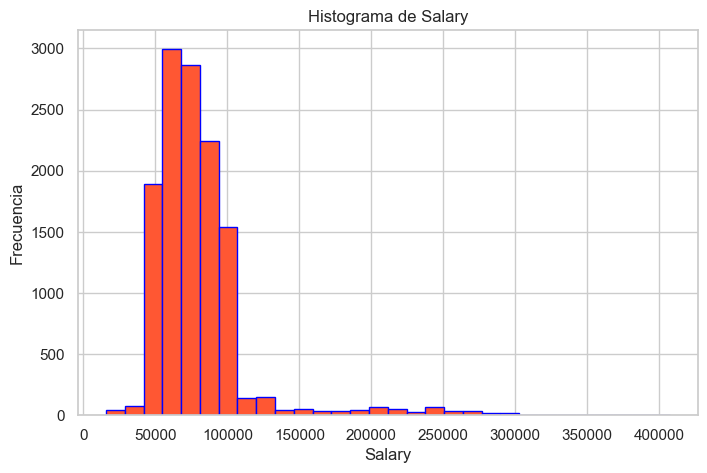

In [445]:
# Creo el histograma para la columna 'Salary' del DataFrame df_loyalty
plt.figure(figsize=(8, 5))
plt.hist(df_loyalty['Salary'].dropna(), bins=30, color='#FF5733', edgecolor='blue')
plt.title('Histograma de Salary')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()



En el caso del salario tiene un % alto de nulos y la distribución no es normal por lo que utilizaremos técnicas avanzadas. Tengo dos opciones:

 - IterativeImputer  
 - KNN

Dado que voy a hacer el tratamiento ahora y no es un número elevado de datos, me decanto por el segundo, que es mas sencillo y mas rápido.


In [446]:
imputer_knn = KNNImputer(n_neighbors=5)
df_loyalty['Salary'] = imputer_knn.fit_transform(df_loyalty[['Salary']])

In [447]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.000000,772019.00,999986.00
Salary,16737.0,79429.572642,29986.165418,15609.00,63991.00,79429.572642,82940.00,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.180000,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.000000,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.000000,10.00,12.00


Miro como ha afectado el tratamiento de nulos a los datos estadísticos; 
La media, maximo y mínimo se mantienen. La desviación se reduce.El percentil del 25% se ha incrementado, pero la mediana ha subido y el percentil del 75% se va a un  valor mas bajo. 

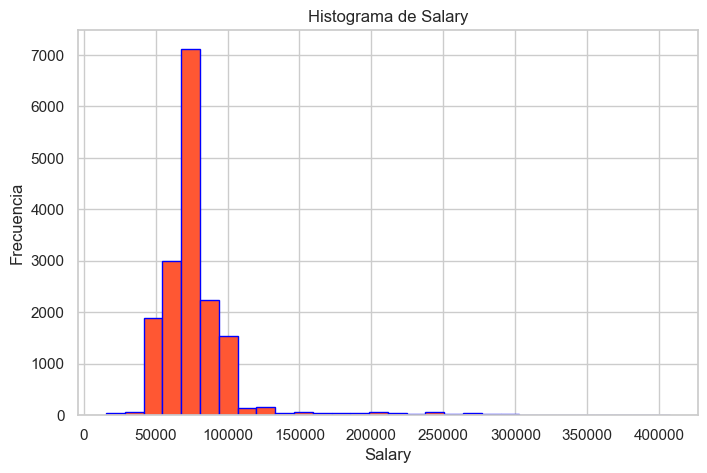

In [448]:
# Crear el histograma para la columna 'Salary' del DataFrame df_loyalty
plt.figure(figsize=(8, 5))
plt.hist(df_loyalty['Salary'].dropna(), bins=30, color='#FF5733', edgecolor='blue')
plt.title('Histograma de Salary')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()


### Unión de tablas   

Voy a unir los dataframe por el método merge, de manera que obtenga los registros de ambos.

In [449]:
df = df_loyalty.merge(df_activity, on='Loyalty Number', how='outer')

In [450]:
df.tail() #Reviso últimos valores

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
403755,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,Activo,Activo,2018,7,15,0,15,1995,199.0,0,0
403756,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,Activo,Activo,2018,9,0,0,0,0,0.0,0,0
403757,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,Activo,Activo,2018,10,6,0,6,708,70.0,0,0
403758,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,Activo,Activo,2018,11,11,4,15,2040,204.0,0,0
403759,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,Activo,Activo,2018,12,0,0,0,0,0.0,0,0


In [451]:
df.duplicated().sum() #Compruebo que no tengo duplicados.

np.int64(0)

In [452]:
df.shape # En el nuevo dataframe tengo 403760 filas y 25 columnas lo cual tiene sentido teniendo en cuenta el tamaño de los dataframe que uní. 

(403760, 25)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       403760 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

He valorado la posibilidad de cambiar la columna Points Accumulated a int a través de una función pero como veremos mas abajo debe haber valores decimales distintos de 0 porque no me permite hacer ese cambio. 

In [454]:
# Crear una función explícita para verificar decimales
def convertir_a_int_si_es_posible(valor):
    if pd.notnull(valor) and valor % 1 == 0:  # Verifica que no sea nulo y que los decimales sean 0
        return int(valor)  # Convierte a entero
    else:
        return valor  # Devuelve el valor original si no cumple las condiciones

# Aplicar la función a la columna 'Points Accumulated'
df['Points Accumulated'] = df['Points Accumulated'].apply(convertir_a_int_si_es_posible)

# Verificar los resultados
print(df['Points Accumulated'].head())


0    152.0
1    132.0
2    311.0
3     92.0
4      0.0
Name: Points Accumulated, dtype: float64


In [455]:
df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [456]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.000000,772152.00,999986.00
Salary,403760.0,79438.561034,29965.369991,15609.00,64001.00,79429.572642,82940.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.340000,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.000000,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.000000,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.000000,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.000000,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.000000,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.000000,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.000000,10.00,32.00


No tiene sentido los datos estadísticos de Loyalty Number, Enrollment Year, Enrollment Month, Year y Month. Valoro la posibilidad de cambio, pero no me va a afectar y los mantengo. 

In [457]:
df.describe(include='object').T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419
Cancellation Year,403760,7,Activo,354110


In [458]:
# Guardo mi nuevo dataframe.

df.to_csv('customer_history.csv', index=False)

### Visualización

<Figure size 1200x600 with 0 Axes>

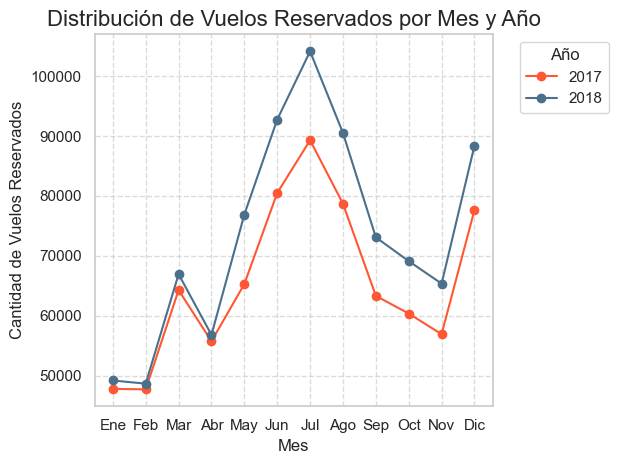

In [459]:
## 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

flights_month_year = df.groupby(['Year', 'Month'])['Flights Booked'].sum() # Agrupo los datos por 'Year', 'Month' y sumo los vuelos reservados

# Creo un gráfico de líneas
plt.figure(figsize=(12, 6))
colores=['#FF5733', '#4A708B'] # Colores del gráfico
flights_month_year.unstack(level=0).plot(marker='o', linestyle='-', color=colores)  # Uso unstack para desapilar los años, level=0 es 'Year'.

# Personalizo el gráfico
plt.title('Distribución de Vuelos Reservados por Mes y Año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Vuelos Reservados', fontsize=12)
plt.xticks(range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.7) # Agrega cuadrícula al gráfico, de líneas discontinuas.
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestro el gráfico
plt.tight_layout()
plt.show()

Vemos que en el año 2018 se incrementan las reservas de vuelos con respecto al 2017, pero hasta abril las diferencias son mas pequeñas y a partir de mayo las diferencias entre los años son mayores.  
Los meses mas fuertes de reservas son junio, julio, agosto y diciembre.

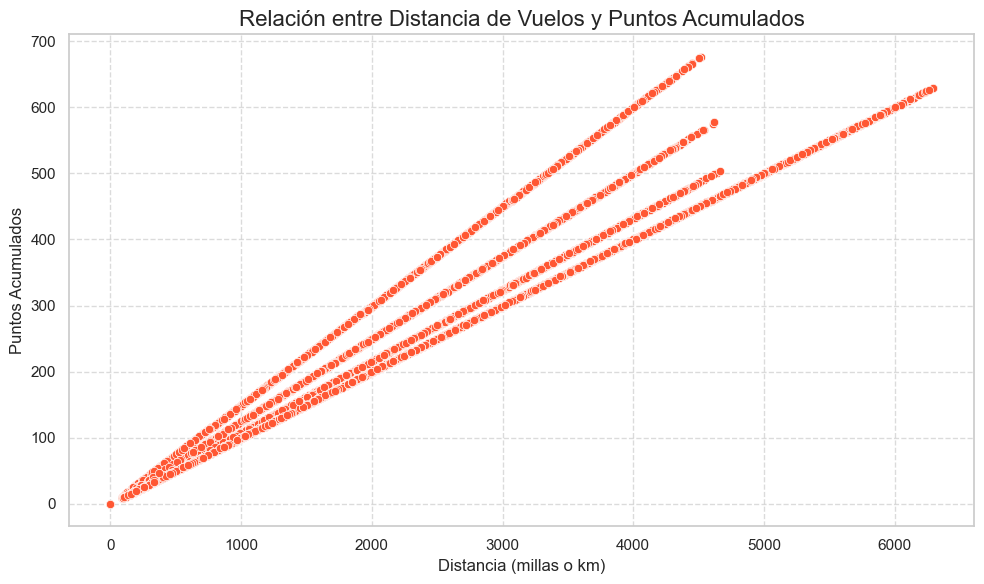

In [460]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Hago un gráfico de dispersión.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', color='#FF5733') # Hago un gráfico de dispersión.

# Personalizo el gráfico
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados', fontsize=16)
plt.xlabel('Distancia (millas o km)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Existe una relación positiva entre la distancia de los vuelos y los puntos acumulados, de tal manera que a mayor distancia, mayor cantidad de puntos. Pero también se pueden observar 4 patrones y trato de averiguar el motivo. Se me ocurre que puede ser por el tipo de tarjeta, asi que incorporo otra variable (Loyalty Card) en el gráfico.

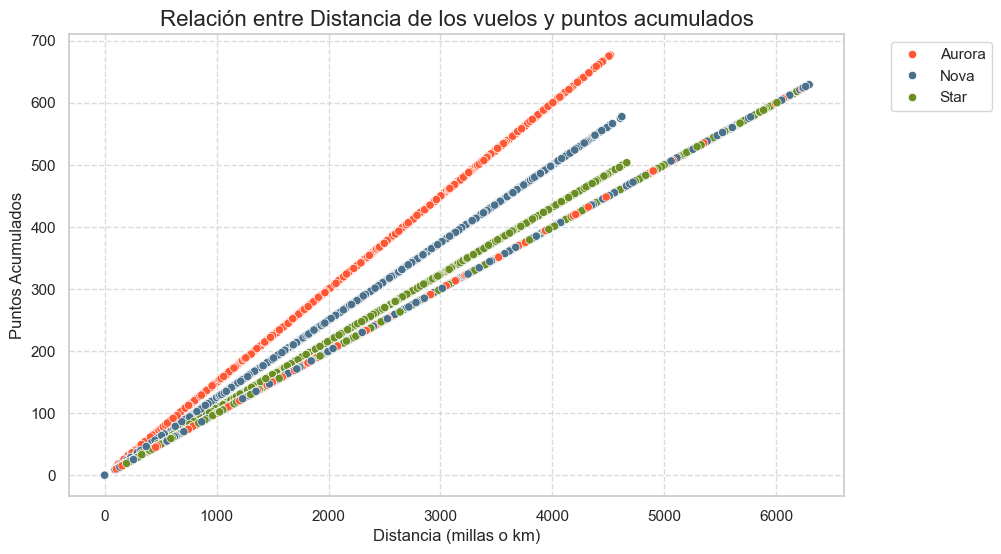

In [461]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', palette=['#FF5733', '#4A708B', '#6B8E23'], hue='Loyalty Card')
plt.title('Relación entre Distancia de los vuelos y puntos acumulados', fontsize=16)
plt.xlabel('Distancia (millas o km)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mostrar la leyenda fuera del gráfico
plt.show()

Se puede observar que la relación entre distancia y puntos acumulados es diferente en función del tipo de tarjeta. Aurora acumula mas puntos por distancia, Nova algo menos y Star es la que menos puntos acumula por distancia. Hay una cuarta línea que mezcla puntos correspondientes a los tres tipos de tarjeta. ¿Pudo haber un cambio a lo largo de los años? Voy a incorporar otra variable (Year).

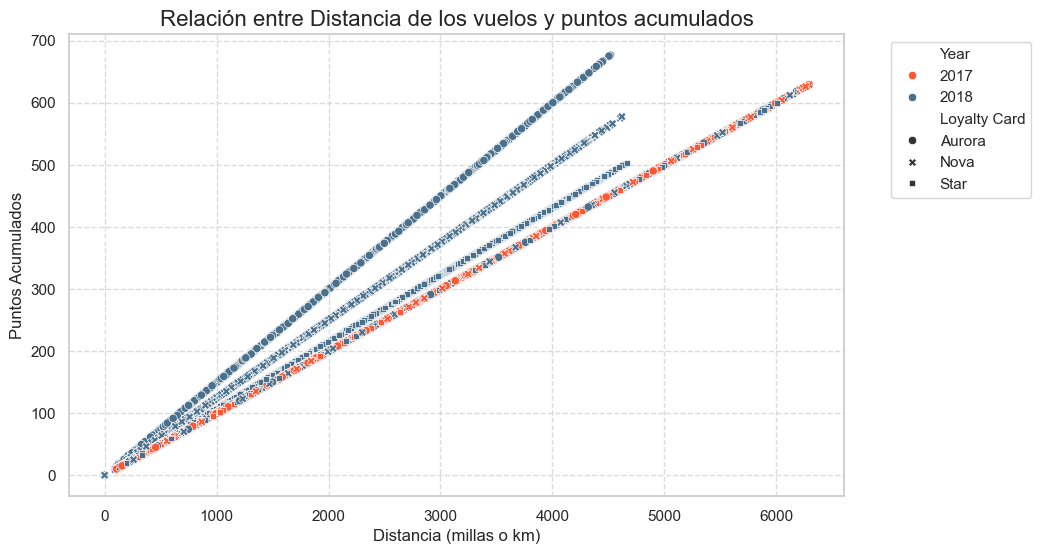

In [462]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', hue='Year', style='Loyalty Card', palette=['#FF5733', '#4A708B'])
plt.title('Relación entre Distancia de los vuelos y puntos acumulados', fontsize=16)
plt.xlabel('Distancia (millas o km)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mostrar la leyenda fuera del gráfico
plt.show()

Parece que puede haber un cambio en el funcionamiento de las tarjetas a lo largo del 2018. Parece que en el 2018 durante algun tiempo la acumulación de puntos por distancia fue la misma para los tres tipos de tarjetas (nos lo muestra la línea con menor inclinación) y durante otro tiempo del 2018 la acumulación de puntos por distancia es diferente entre los tres tipos de tarjetas. Dado que en el 2017 los datos siguen el mismo patrón en función del tipo de tarjeta, supongo que hubo un momento en el 2018 que cambiaron el programa y que en función del tipo de tarjeta se empezaron a otorgar diferentes puntos en función de la distancia recorrida. 

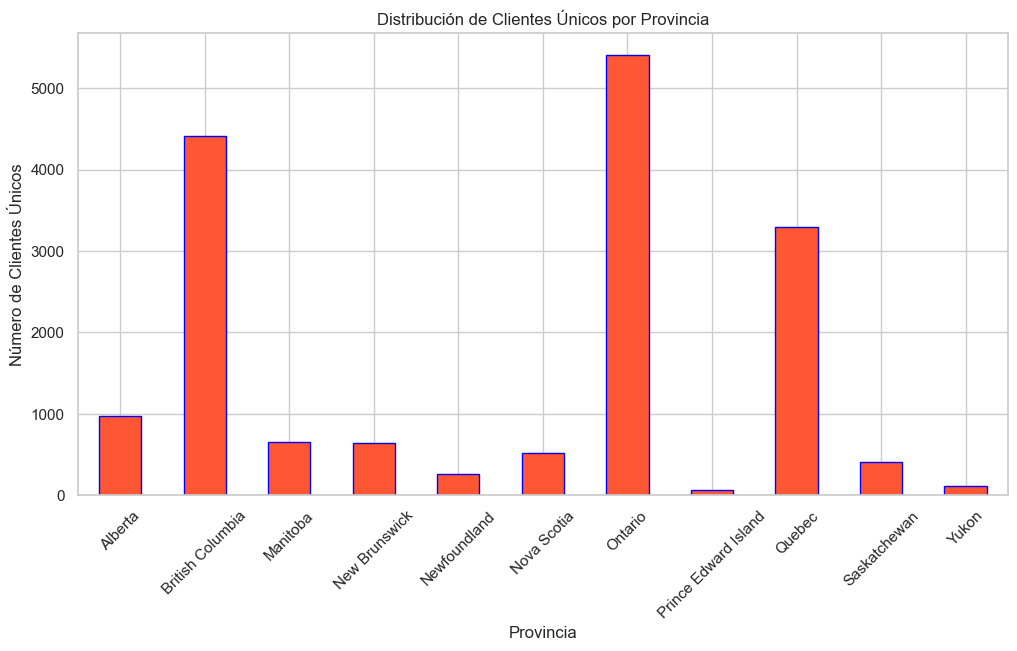

In [463]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada provincia

clientes_provincia = df.groupby('Province')['Loyalty Number'].nunique() #Valores únicos de Loyalty Number por provincia.

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
clientes_provincia.plot(kind='bar', color='#FF5733', edgecolor='blue')
plt.title('Distribución de Clientes Únicos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes Únicos')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad
plt.show()


La mayoría de los clientes son residentes en:
Ontario - Mas de 5000 clientes.
British Columbia - Mas de 4000 clientes.
Quebec - Mas de 3000 clientes.
Resto de estados - por debajo de 1000 clientes.


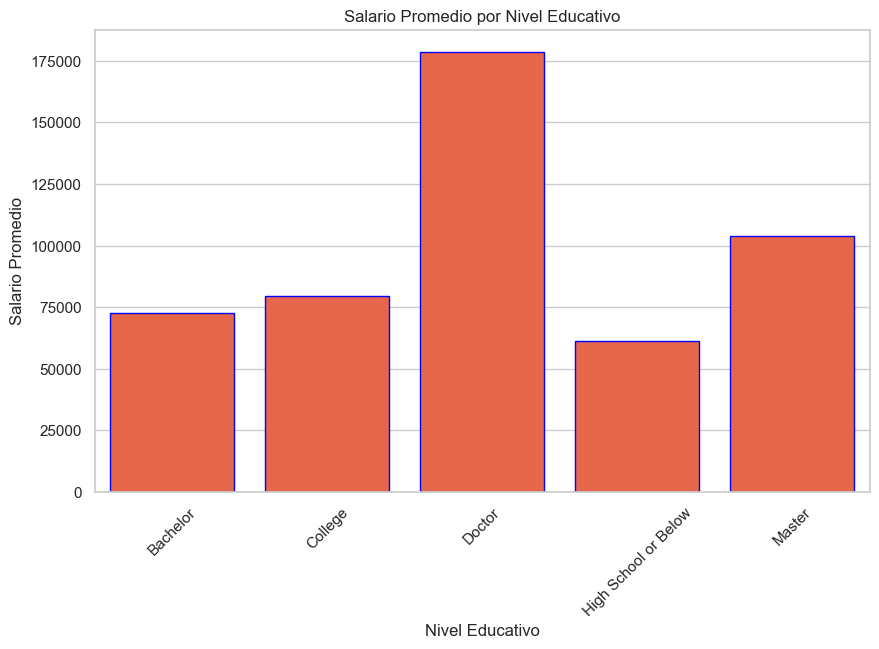

In [464]:
# 4. Compara el salario promedio por nivel educativo.

# Dado que tengo los mismos clientes varias veces en función de las reservas creo que un nuevo dataframe donde sólo se tengan en cuenta los clientes una vez para que el salario
# medio no se vea afectado.

df_unique = df.drop_duplicates(subset='Loyalty Number')
salario_promedio_educacion = df_unique.groupby('Education')['Salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Salary', data=salario_promedio_educacion, color='#FF5733', edgecolor='blue')
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

He realizado un gráfico de barras en Seaborn, en donde podemos visualizar el Nivel Educativo en el eje de las X y el salario promedio en el eje de las Y. El salario promedio mas alto es para Doctor y Master y el mas bajo para High School or Below.

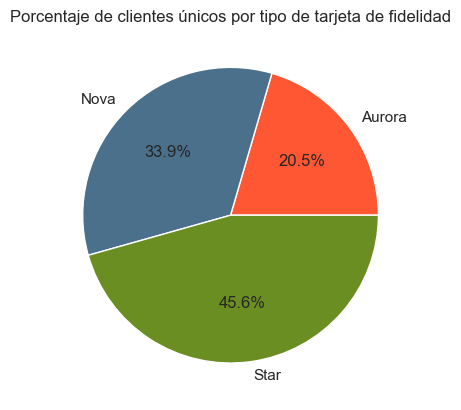

In [465]:
# 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?

conteo_tarjetas = df.groupby('Loyalty Card')['Loyalty Number'].nunique() # Cuento los clientes únicos por tipo de tarjeta.

porcentaje_tarjetas = (conteo_tarjetas / df['Loyalty Number'].nunique()) * 100 # Calculo el porcentaje de clientes por cada tipo de tarjeta

# Gráfico pie chart
plt.pie(porcentaje_tarjetas, labels=porcentaje_tarjetas.index, autopct="%1.1f%%", colors=['#FF5733', '#4A708B', '#6B8E23']) #esto es para que nos diga el porcentaje
plt.title('Porcentaje de clientes únicos por tipo de tarjeta de fidelidad')
plt.show()

He creado un Pie Chart que me muestra el porcentaje de clientes por cada tipo de tarjeta de fidelidad. Para ello primero hago sobre el dataframe un groupby para cada tipo de tarjeta y me cuenta los clientes únicos y luego calculo el porcentaje.

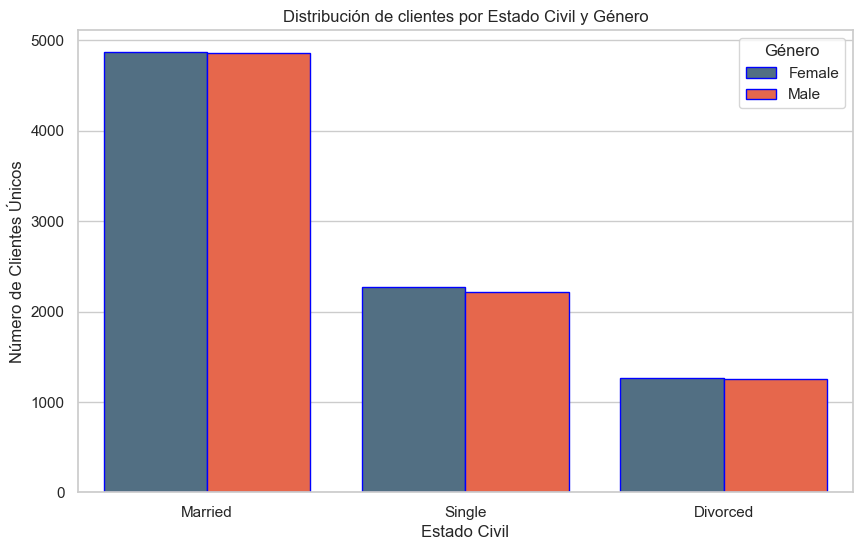

In [466]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes separados por la categoría de estado civil 
# y que en cada categoría vea cuáles son hombres y cuales mujeres


# Agrupo por 'Loyalty Number', tomar la primera aparición y contar por estado civil y género
unique_counts = df.groupby('Loyalty Number')[['Marital Status', 'Gender']].first().value_counts().reset_index(name='Count')

# Creo una paleta de colores.

gender_colors = {'Male': '#FF5733', 'Female': '#4A708B'} 

# Creo la gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_counts, x='Marital Status', y='Count', hue='Gender', palette=gender_colors, edgecolor='blue')

# Añado títulos y etiquetas
plt.title('Distribución de clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes Únicos')
plt.legend(title='Género')

# Muestro la gráfica
plt.show()

Mis clientes son en su mayoría casados, seguidos por los solteros y finalmente los divorciados. 
En cuanto al género es mayor el número de mujeres que de hombres en cualquiera de los estados civiles. 

#### FASE 3 

Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los
clientes. 

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights
Booked' y 'Education'.

In [467]:
df_filtrado = df[['Flights Booked', 'Education']]
df_filtrado.head()

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor


2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el
promedio, la desviación estándar) del número de vuelos reservados para cada grupo

In [468]:
grupo_educacion = df_filtrado.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count','median'])
grupo_educacion.T


Education,Bachelor,College,Doctor,High School or Below,Master
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
median,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\famil\AppData\Local\Temp\ipykernel_18984\3831176645.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Flights Booked', data=df_filtrado, palette=palette)


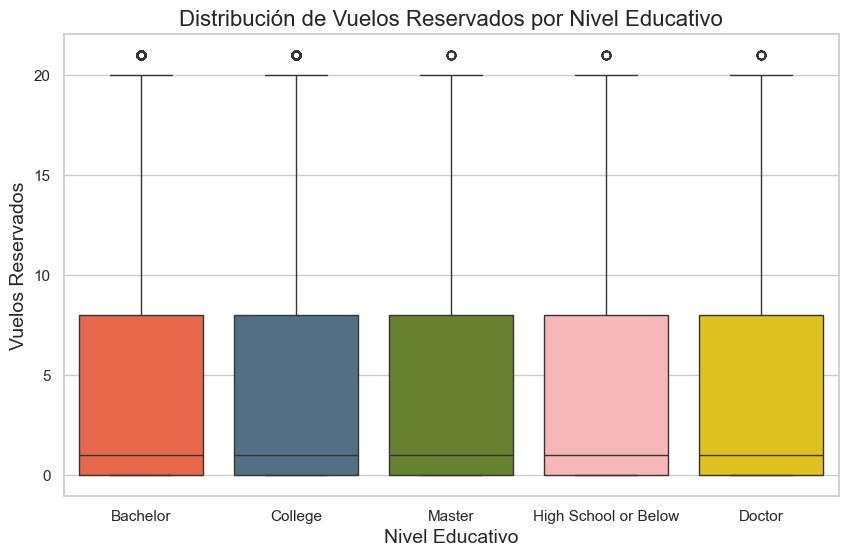

In [469]:
#Creo mi paleta de colores para el gráfico
palette=['#FF5733', '#4A708B', '#6B8E23', '#FFADAD', '#FFD700']

# Creo el gráfico.
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(x='Education', y='Flights Booked', data=df_filtrado, palette=palette)

# Añado títulos y etiquetas
plt.title('Distribución de Vuelos Reservados por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Vuelos Reservados', fontsize=14)

# Muestro el gráfico
plt.show()

No hay grandes diferencias de vuelos reservados entre los niveles educativos. Podemos observar en el gráfico la mediana que es igual para todos los niveles y los bigotes que nos muestran el rango de los datos. Fuera de los bigotes tenemos algún valor atípico. 

3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el
número de vuelos reservados entre los diferentes niveles educativos. Como son varios grupos, puedes ir
comparándolos de dos en dos

In [470]:
## tenemos una superfunción con todo el proceso

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas." if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas."
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [471]:
# Separo los datos por nivel educativo:

master = df_filtrado[df_filtrado['Education'] == 'Master']['Flights Booked']
bachelor = df_filtrado[df_filtrado['Education'] == 'Bachelor']['Flights Booked']
college = df_filtrado[df_filtrado['Education'] == 'College']['Flights Booked']
high_school = df_filtrado[df_filtrado['Education'] == 'High School or Below']['Flights Booked']
doctor = df_filtrado[df_filtrado['Education'] == 'Doctor']['Flights Booked']


# Comparo grupos de dos en dos
print("Comparando Master vs Bachelor:")
prueba_hipotesis(master, bachelor)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Master vs College:")
prueba_hipotesis(master, college)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Master vs High School or Below:")
prueba_hipotesis(master, high_school)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Master vs Doctor:")
prueba_hipotesis(master, doctor)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Bachelor vs College:")
prueba_hipotesis(bachelor, college)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Bachelor vs High School or Below:")
prueba_hipotesis(bachelor, high_school)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando Bachelor vs Doctor:")
prueba_hipotesis(bachelor, doctor)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando College vs High School or Below:")
prueba_hipotesis(college, high_school)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando College vs Doctor:")
prueba_hipotesis(college, doctor)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')

print("Comparando High School or Below vs Doctor:")
prueba_hipotesis(high_school, doctor)
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n')


Comparando Master vs Bachelor:

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1570750501.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas.


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Comparando Master vs College:

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.7302)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 632080235.5000, p-valor: 0.2384
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas.


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Comparando Master vs High School or Below:

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: I

Las únicas comparaciones con diferencias significativas son:  

-Master vs Bachelor.  

-Bachelor vs College.  

-Bachelor vs High School or Below.  

En el resto de las comparaciones, no hay diferencias significativas en el número de vuelos reservados entre los grupos educativos.